In [234]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print('successfully loaded')

successfully loaded


In [235]:
df = pd.read_csv('Data/diabetic_data.csv')
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [236]:
print('Shape : ',df.shape,'\n')
print(df.info())
df.describe()

Shape :  (101766, 50) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 no

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [237]:
def check_null(df):
    df_null = df.isnull().mean()
    missing = []
    for i in range(len(df_null)):
        if(df_null[i]!=0.0):
            missing.append(df.columns[i])
            print(df_null[i]*100,'% of col ',df.columns[i]," is null." )
    if(missing== []):
        print('There is no Null value')
    else :
        print(missing)

In [238]:
check_null(df)

There is no Null value


In [239]:
for col in df.columns:
    print(col, ' : ')
    print(df[col].unique(),'\n')

encounter_id  : 
[  2278392    149190     64410 ... 443854148 443857166 443867222] 

patient_nbr  : 
[  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race  : 
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender  : 
['Female' 'Male' 'Unknown/Invalid'] 

age  : 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight  : 
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id  : 
[6 1 2 3 4 5 8 7] 

discharge_disposition_id  : 
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 

admission_source_id  : 
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital  : 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code  : 
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

medical_specialty  : 
['Pediatrics-Endocrinology' '?' 'InternalMedicine

In [240]:
List_NA = ['?','Unknown/Invalid','Not Mapped','NULL']

for col in df.columns:
    df[col] = df[col].apply(lambda x : np.NaN if(x in List_NA) else x)

In [241]:
check_null(df)

2.2335554114340743 % of col  race  is null.
0.002947939390366134 % of col  gender  is null.
96.85847925633315 % of col  weight  is null.
39.5574160328597 % of col  payer_code  is null.
49.08220820313268 % of col  medical_specialty  is null.
0.02063557573256294 % of col  diag_1  is null.
0.3517874339170253 % of col  diag_2  is null.
1.398305917497003 % of col  diag_3  is null.
['race', 'gender', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


In [242]:
df.drop(['weight','payer_code','encounter_id','examide','citoglipton','medical_specialty','diag_2','diag_3'],axis=1,inplace=True)
check_null(df)

2.2335554114340743 % of col  race  is null.
0.002947939390366134 % of col  gender  is null.
0.02063557573256294 % of col  diag_1  is null.
['race', 'gender', 'diag_1']


In [243]:
df.dropna(inplace=True)
check_null(df)

There is no Null value


In [244]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [245]:
df.drop(['number_outpatient','number_emergency','number_inpatient'], axis=1,inplace=True)

In [246]:
df['readmitted'].value_counts()

NO     53305
>30    35004
<30    11164
Name: readmitted, dtype: int64

In [247]:
df['readmitted'] = df['readmitted'].apply(lambda x : 'YES' if(x == '<30') else 'NO')
df['readmitted'].value_counts()

NO     88309
YES    11164
Name: readmitted, dtype: int64

In [248]:
print(df.shape)
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
print(df.shape)

(99473, 40)
(69658, 40)


In [249]:
df.head().T

,0,1,2,3,4
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0


### Feature ingeneering :

We have too many features, we will ave either too choose or create new features combining the given ones

In [250]:
def readmitted_vs(col):
    df1 = pd.DataFrame()
    df1['readmitted'] = df[df['readmitted']=='YES'].groupby([col])['readmitted'].count()
    df1['not-readmitted'] = df[df['readmitted']=='NO'].groupby([col])['readmitted'].count()
    title = 'Number of readmitted patient vs '+ col
    df1.plot(kind='bar',y=['readmitted','not-readmitted'], title=title)


C:\Users\thoma\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


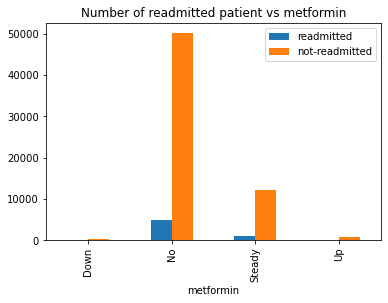

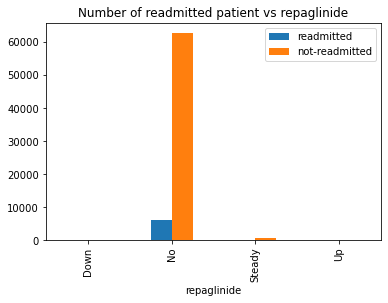

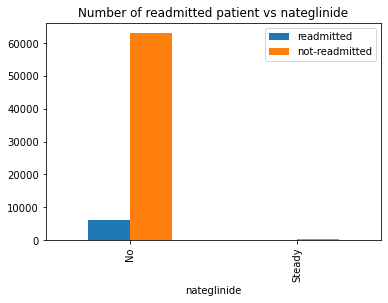

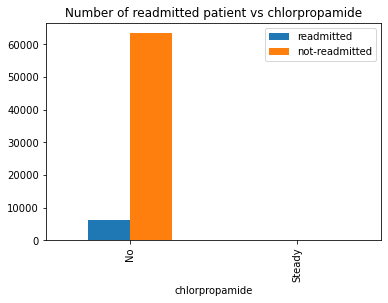

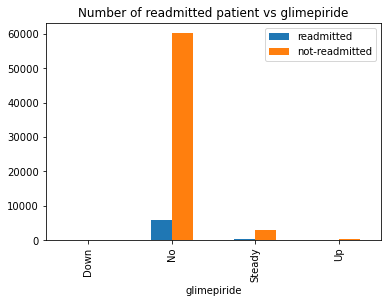

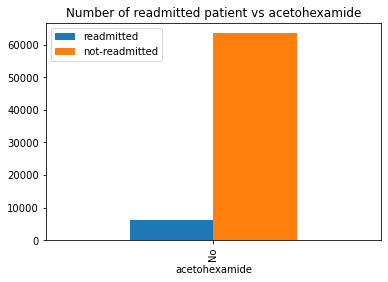

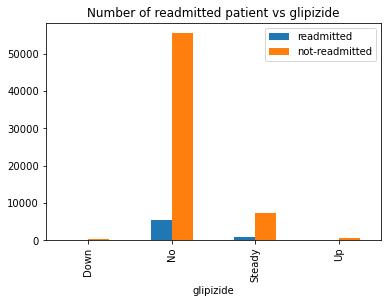

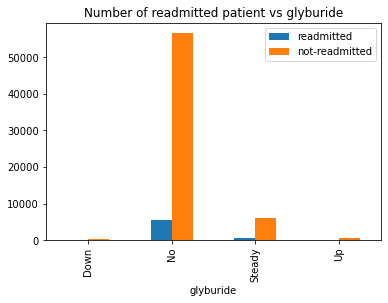

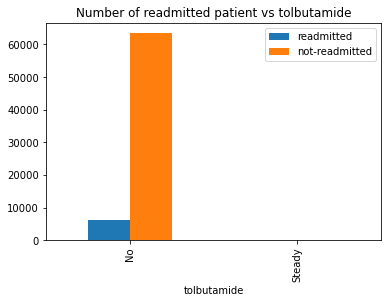

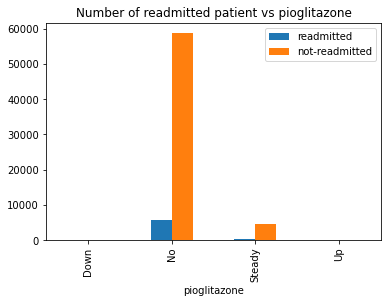

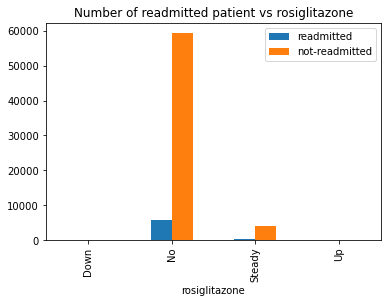

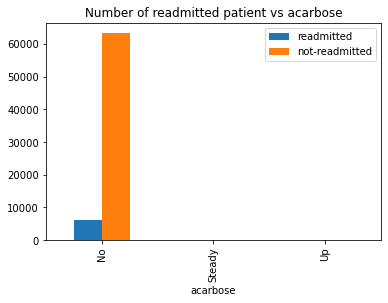

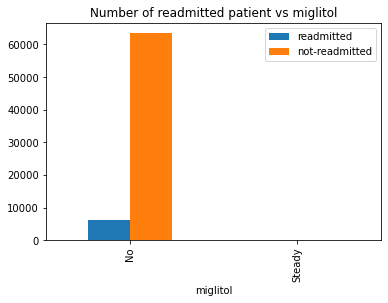

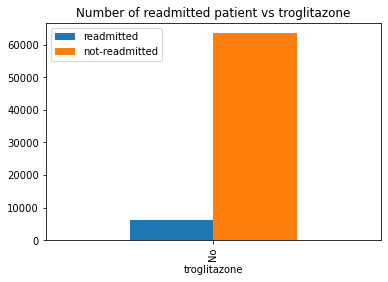

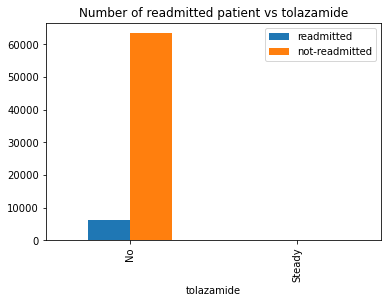

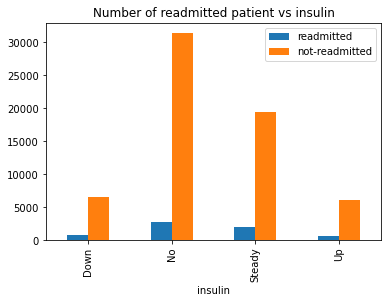

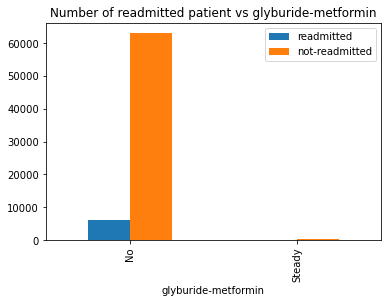

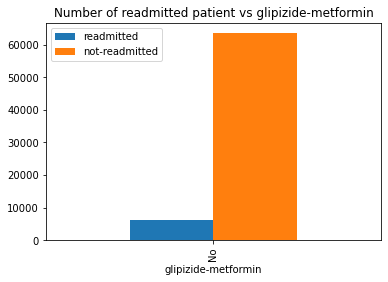

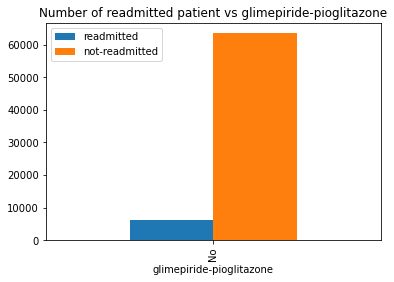

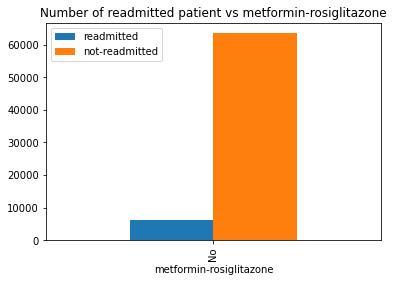

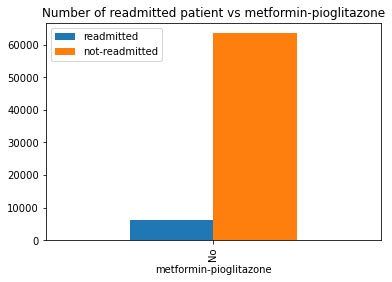

In [251]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
for d in drugs:
    readmitted_vs(d)

We can see that some drugs are useless so we will drop the columns corresponding to them.

In [252]:
useless_drugs = ['repaglinide','nateglinide','chlorpropamide','acetohexamide','glipizide','tolbutamide',
                 'acarbose','miglitol', 'troglitazone','tolazamide','glyburide-metformin',
                 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

df.drop(useless_drugs,inplace=True,axis=1)
df.shape

(69658, 25)

In [253]:
def level1_diag1(x):
    if(type(x) == int):
        if (x >= 390 and x < 460) or (np.floor(x) == 785):
            return 1
        elif (x >= 460 and x < 520) or (np.floor(x) == 786):
            return 2
        elif (x >= 520 and x < 580) or (np.floor(x) == 787):
            return 3
        elif (np.floor(x) == 250):
            return 4
        elif (x >= 800 and x < 1000):
            return 5
        elif (x >= 710 and x < 740):
            return 6
        elif (x >= 580 and x < 630) or (np.floor(x) == 788):
            return 7
        elif (x >= 140 and x < 240):
            return 8
        else:
            return 0
    else:
        return 0

In [254]:
df['diag_1'] = df['diag_1'].apply(lambda x : level1_diag1(x))
df.head().T

,0,1,2,3,4
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0


In [255]:
df.admission_source_id.value_counts()

# There way is too much different value in this column. We will use the info from id_mapping to create new groups.

7     37621
1     21400
17     4883
4      2412
6      1578
2       866
5       539
20      154
3       138
9        39
8        12
10        6
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64

In [256]:
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)

df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(8,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(18,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(26,4)


df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)

df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)
df['admission_source_id'] = df['admission_source_id'].replace(23,11)
df['admission_source_id'] = df['admission_source_id'].replace(24,11)

df.admission_source_id.value_counts()

7     37621
1     22404
9      5076
4      4553
11        4
Name: admission_source_id, dtype: int64

In [257]:
df.admission_type_id.value_counts()

1    35634
3    13606
2    12448
6     4523
5     3130
8      288
7       20
4        9
Name: admission_type_id, dtype: int64

In [258]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)   # Urgent to Emergency
df['admission_type_id'] = df['admission_type_id'].replace(7,1)   # Trauma center to Emergency
df['admission_type_id'] = df['admission_type_id'].replace(4,1)   # Newborn to Emergency
df['admission_type_id'] = df['admission_type_id'].replace(6,5)   # Null to Not available
df['admission_type_id'] = df['admission_type_id'].replace(8,5)   # Not Mapped to Not available

df.admission_type_id.value_counts()

1    48111
3    13606
5     7941
Name: admission_type_id, dtype: int64

In [259]:
df.discharge_disposition_id.value_counts()

1     43084
3      8541
6      8123
18     2457
2      1481
22     1401
11     1052
5       880
25      762
4       502
7       398
23      256
13      242
14      215
28       89
8        72
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [260]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(19,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(20,1)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(10,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,15)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,15)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(27,15)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(28,15)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(29,15)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(30,15)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df.discharge_disposition_id.value_counts()

1     51528
2     13318
18     3219
11     1052
7       398
15      143
Name: discharge_disposition_id, dtype: int64

In [261]:
numerics  = []
labels = []

for col in df.columns:
    if(df[col].dtype in ['int64','float64']):
        numerics.append(col)
    else :
        labels.append(col)
print('encoded/numbers : \n', numerics)
print('\n to encode : \n',labels)

encoded/numbers : 
 ['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1', 'number_diagnoses', 'service_utilization']

 to encode : 
 ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [262]:
df.head().T

,0,1,2,3,4
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,5,1,1,1,1
discharge_disposition_id,18,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0


In [263]:
df2 = df[['patient_nbr','time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'service_utilization']]

df2.head()         

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,service_utilization
0,8222157,1,41,0,1,1,0
1,55629189,3,59,0,18,9,0
2,86047875,2,11,5,13,6,3
3,82442376,2,44,1,16,7,0
4,42519267,1,51,0,8,5,0


In [264]:
from sklearn.preprocessing import StandardScaler

In [274]:
cols_to_standardize = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications', 
                       'number_diagnoses','service_utilization']
for col in cols_to_standardize :
    df2[col] =( df2[col] - df2[col].mean() ) / df2[col].std()

C:\Users\thoma\AppData\Local\Temp/ipykernel_16884/227921415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] =( df2[col] - df2[col].mean() ) / df2[col].std()


In [276]:
cols_to_change = [e for e in df.columns if e not in df2.columns]
cols_to_change

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [277]:
def modify_and_add_col_in(col,df1=df,df2=df2):
    new_cols = []
    for val in df1[col].unique():
        df2[col+'_'+ str(val)] = df1[col].apply(lambda x : 1 if(x==val) else 0)


In [308]:
for col in cols_to_change :
    modify_and_add_col_in(col)

In [316]:
df2.tail()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,service_utilization,race_Caucasian,race_AfricanAmerican,race_Other,...,insulin_No,insulin_Up,insulin_Steady,insulin_Down,change_Ch,diabetesMed_Yes,readmitted_YES,change_No,diabetesMed_No,readmitted_NO
101754,183087545,1.596398,0.347907,0.323687,2.083816,0.873906,-0.395044,1,0,0,...,0,0,1,0,1,1,0,0,0,1
101755,188574944,3.291352,1.499020,2.599934,1.240531,0.873906,0.297738,0,0,1,...,0,1,0,0,1,1,0,0,0,1
101756,140199494,-0.776538,0.147713,2.599934,0.156307,0.873906,1.683301,0,0,1,...,0,0,1,0,0,1,0,1,0,1
101758,120975314,0.240434,1.649166,-0.245375,0.758653,0.873906,0.297738,1,0,0,...,0,1,0,0,1,1,0,0,0,1
101765,175429310,0.579425,-1.503885,0.892749,-1.530264,0.873906,-0.395044,1,0,0,...,1,0,0,0,0,0,0,1,1,1


In [309]:
for col in df2.columns:
    print(col, ' : ')
    print(df2[col].unique(),'\n')

patient_nbr  : 
[  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

time_in_hospital  : 
[-1.11552906 -0.4375473  -0.77653818 -0.09855642  0.24043446  2.9523615
  2.61337062  1.59639798  0.91841622  1.93538886  2.27437974  0.57942534
  1.2574071   3.29135238] 

num_lab_procedures  : 
[-1.02528919e-01  7.98342626e-01 -1.60398150e+00  4.76163382e-02
  3.97955273e-01 -6.03013111e-01  1.34887524e+00  1.49902049e+00
  1.24877840e+00 -5.02916273e-01  1.97761596e-01  9.48487884e-01
  8.48391045e-01  5.98148949e-01  2.97858434e-01  1.59911733e+00
  9.76647574e-02 -7.03109950e-01 -4.02819435e-01 -5.24805002e-02
 -1.20359414e+00  1.04858472e+00 -9.03303627e-01  4.98052111e-01
  4.48003692e-01  2.19969836e+00 -8.03206788e-01 -3.02722596e-01
  1.47713177e-01 -7.53158369e-01 -3.52771015e-01  2.47810015e-01
  1.44897208e+00 -1.65402991e+00 -2.05441727e+00  1.09863314e+00
  1.19872998e+00 -1.52577339e-01  7.48294207e-01  6.98245788e-01
 -5.52964692e-01  1.99950469e+00 -4.52867854e-01 

In [279]:
df2.drop(['readmitted_NO', 'diabetesMed_No','change_No'],axis=1,inplace=True)

In [280]:
X = df2.drop(columns=["readmitted_YES",'patient_nbr'], axis=1)
y = df2.readmitted_YES

In [302]:
df2.head()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,service_utilization,race_Caucasian,race_AfricanAmerican,race_Other,...,rosiglitazone_Steady,rosiglitazone_Up,rosiglitazone_Down,insulin_No,insulin_Up,insulin_Steady,insulin_Down,change_Ch,diabetesMed_Yes,readmitted_YES
0,8222157,-1.115529,-0.102529,-0.814437,-1.771202,-3.149361,-0.395044,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,55629189,-0.437547,0.798343,-0.814437,0.276776,0.873906,-0.395044,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,86047875,-0.776538,-1.603981,2.030872,-0.325570,-0.634819,1.683301,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,82442376,-0.776538,0.047616,-0.245375,0.035837,-0.131911,-0.395044,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,42519267,-1.115529,0.397955,-0.814437,-0.927917,-1.137728,-0.395044,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [281]:
from imblearn.over_sampling import SMOTE  

In [319]:
sm = SMOTE(k_neighbors = 3 ,random_state=42)
print('X shape : ', X.shape,'  Y shape', y.shape)
X_res, y_res = sm.fit_resample(X, y)
print('Resampling...')
print('new X shape : ', X_res.shape,'new Y shape', y_res.shape)

X shape :  (69658, 72)   Y shape (69658,)
Resampling...
new X shape :  (126986, 72) new Y shape (126986,)


In [291]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 37)

<AxesSubplot:>

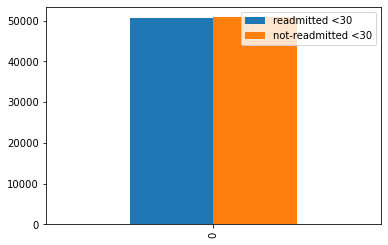

In [292]:
train_repartition = pd.DataFrame(data = [[int(y_train.sum()),int(y_train.shape[0] - y_train.sum())]] ,columns = ['readmitted <30','not-readmitted <30'])
train_repartition.plot(kind='bar')

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:

def test_tree_c(parameters, scoring_type,X_train, X_test, y_train, y_test):
    m_tree = DecisionTreeClassifier()
    
    grid = GridSearchCV(m_tree,parameters,scoring=scoring_type)

    grid.fit(X_train,y_train)
    
    print('Decision tree :')
    print('Best training accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    
    pred = grid.best_estimator_.predict(X_test)
    matrix = confusion_matrix( pred , y_test)
    print('Validation accuracy = ',metrics.accuracy_score(pred , y_test))
    print('test repartition : \n',y_test.value_counts())
    print('Confusion matrix : \n',matrix)
    tree_res = pd.DataFrame(grid.cv_results_)
    
    return grid.best_estimator_,tree_res

def test_rf_c(parameters, scoring_type,X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier()
    
    grid = GridSearchCV(rf,parameters,scoring=scoring_type)

    grid.fit(X_train,y_train)
    
    print('Random Forest :')
    print('Best training accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    
    pred = grid.best_estimator_.predict(X_test)
    matrix = confusion_matrix( pred , y_test)
    print('Validation accuracy = ',metrics.accuracy_score(pred , y_test))
    print('test repartition : \n',y_test.value_counts())
    print('Confusion matrix : \n',matrix)
    rf_res = pd.DataFrame(grid.cv_results_)
    
    return grid.best_estimator_,rf_res
    
    

def test_gb_c(parameters, scoring_type,X_train, X_test, y_train, y_test):
    gb = GradientBoostingClassifier()
    
    grid = GridSearchCV(gb,parameters,scoring=scoring_type)

    grid.fit(X_train,y_train)
    
    print('Gradiant boosting : ')
    print('Best training accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    pred = grid.best_estimator_.predict(X_test)
    matrix = confusion_matrix( pred , y_test)
    print('Validation accuracy = ',metrics.accuracy_score(pred , y_test))
    print('test repartition : \n',y_test.value_counts())
    print('Confusion matrix : \n',matrix)
    gb_res = pd.DataFrame(grid.cv_results_)
    
    return grid.best_estimator_,gb_res
    


In [335]:
import winsound
import time
def make_sound():
    winsound.Beep(440,2000)

In [334]:
make_sound()

In [336]:
def validation_curve(res):
    plt.plot(res['param_n_estimators'],res['mean_test_score'])
    plt.title('accuracy vs n_estimators')
    plt.show()


In [337]:

scoring_type='accuracy'

##------------------------------------------Decision tree------------------------------------------##


param_tree = {'max_depth':[i*10 for i in range(1,21)],'criterion' : ["entropy"]}

model_tree,tree_res = test_tree_c(param_tree, scoring_type,X_train, X_test, y_train, y_test)
make_sound()

Random Forest :
Best training accuracy =  0.897192574764498
Best parameters :  {'criterion': 'entropy', 'max_depth': 80}
Validation accuracy =  0.8995590203953067
test repartition : 
 1    12741
0    12657
Name: readmitted_YES, dtype: int64
Confusion matrix : 
 [[11245  1139]
 [ 1412 11602]]


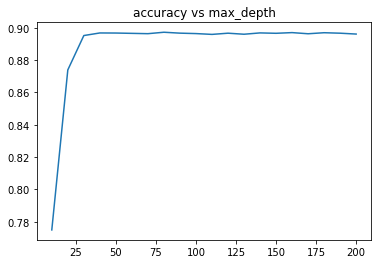

In [412]:
plt.plot(tree_res['param_max_depth'],tree_res['mean_test_score'])
plt.title('accuracy vs max_depth')
plt.show()

In [390]:
conf_dt =confusion_matrix(model_tree.predict(X),y)
conf_dt

array([[62081,   985],
       [ 1412,  5180]], dtype=int64)

In [402]:
accuracy_dt = (conf_dt[0,0] + conf_dt[1,1])/sum(sum(conf_dt))
print(accuracy_dt)
real_positive_dt = conf_dt[1,1]/(conf_dt[1,1]+conf_dt[0,1])
print(real_positive_dt)

0.9655890206437164
0.8402270884022709


Random Forest :
Best training accuracy =  0.9572882679885077
Best parameters :  {'max_features': 'sqrt', 'n_estimators': 360}
Validation accuracy =  0.9567288762894716
test repartition : 
 1    12741
0    12657
Name: readmitted_YES, dtype: int64
Confusion matrix : 
 [[12544   986]
 [  113 11755]]


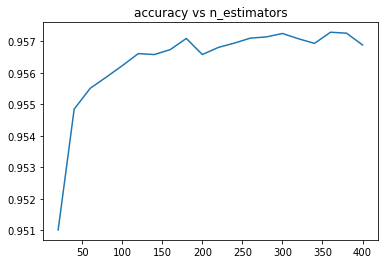

In [340]:
scoring_type='accuracy'

##------------------------------------------RF------------------------------------------##

# Number of trees in random forest
n_estimators = [20*i for i in range(1,21)]
# Max features
max_features = ['sqrt'] #  = sqrt(n_features)

param_rf = {'n_estimators': n_estimators,
            'max_features' : max_features
               }
rf,rf_res = test_rf_c(param_rf, scoring_type,X_train, X_test, y_train, y_test)

validation_curve(rf_res)

make_sound()

In [404]:
conf_rf = confusion_matrix(rf.predict(X),y)
conf_rf

array([[63380,   958],
       [  113,  5207]], dtype=int64)

In [405]:
accuracy_rf = (conf_rf[0,0] + conf_rf[1,1])/sum(sum(conf_rf))
print(accuracy_rf)
real_positive_rf = conf_rf[1,1]/(conf_rf[1,1]+conf_rf[0,1])
print(real_positive_rf)


0.9846248815642137
0.8446066504460665


In [343]:
names = X.columns
rfimp = rf.feature_importances_

dicti = {e:k for (e,k) in zip(names,rfimp)}

In [344]:
dicti

{'time_in_hospital': 0.12134548601470473,
 'num_lab_procedures': 0.08498619205693554,
 'num_procedures': 0.08881544428539796,
 'num_medications': 0.09185134387393236,
 'number_diagnoses': 0.08563014370594496,
 'service_utilization': 0.08101530130992715,
 'race_Caucasian': 0.012779710244213502,
 'race_AfricanAmerican': 0.010444879167925207,
 'race_Other': 0.0027788138854486703,
 'race_Asian': 0.0009846123174960762,
 'race_Hispanic': 0.0031138631236839,
 'gender_Female': 0.015346729392142416,
 'gender_Male': 0.01593643538499643,
 'age_[0-10)': 0.0002685200678779525,
 'age_[10-20)': 0.001149012900453161,
 'age_[20-30)': 0.002936421451749377,
 'age_[30-40)': 0.006608973219764437,
 'age_[40-50)': 0.012118590063851157,
 'age_[50-60)': 0.016094220789034518,
 'age_[60-70)': 0.015457280580342226,
 'age_[70-80)': 0.016938720537223752,
 'age_[80-90)': 0.014552687828764368,
 'age_[90-100)': 0.006091345847966998,
 'admission_type_id_5': 0.007014349616292987,
 'admission_type_id_1': 0.01024048713862

<AxesSubplot:title={'center':'10 best importances'}, ylabel='Feature'>

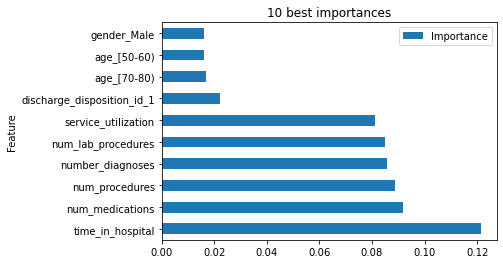

In [389]:
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.plot(kind ='barh', x = 'Feature',y='Importance', title = '10 best importances')

Gradiant boosting : 
Best training accuracy =  0.8443419051851366
Best parameters :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'random_state': 1, 'subsample': 1}
Validation accuracy =  0.8446334357035987
test repartition : 
 1    12741
0    12657
Name: readmitted_YES, dtype: int64
Confusion matrix : 
 [[11454  2743]
 [ 1203  9998]]


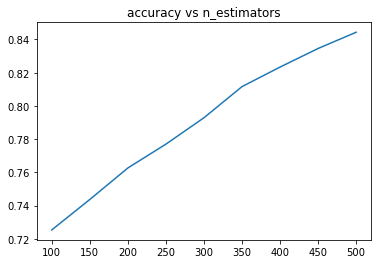

In [346]:
scoring_type='accuracy'

##------------------------------------------GB------------------------------------------##

param_gb = {'n_estimators': [50*i for i in range(2,11)], 'learning_rate' : [.01], 'max_depth' : [3], 'subsample' : [1], 'random_state': [1]}
gb,gb_res = test_gb_c(param_gb, scoring_type,X_train, X_test, y_train, y_test)
validation_curve(gb_res)

In [406]:
conf_gb = confusion_matrix(gb.predict(X),y)
conf_gb

array([[57310,  5068],
       [ 6183,  1097]], dtype=int64)

In [407]:
accuracy_gb = (conf_gb[0,0] + conf_gb[1,1])/sum(sum(conf_gb))
print(accuracy_gb)
real_positive_gb = conf_gb[1,1]/(conf_gb[1,1]+conf_gb[0,1])
print(real_positive_gb)


0.8384822992333975
0.17793998377939985


## Without smote to oversample

<AxesSubplot:>

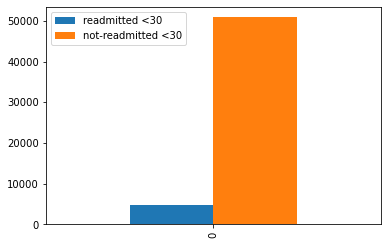

In [408]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size = 0.2, random_state = 37)

train_repartition2 = pd.DataFrame(data = [[int(y_train_new.sum()),int(y_train_new.shape[0] - y_train_new.sum())]] ,columns = ['readmitted <30','not-readmitted <30'])
train_repartition2.plot(kind='bar')

In [410]:

scoring_type='accuracy'

##------------------------------------------Decision tree------------------------------------------##

param_tree = {'max_depth':[i*10 for i in range(1,11)],'criterion' : ["entropy"]}
model_tree2,tree_res2 = test_tree_c(param_tree, scoring_type,X_train_new, X_test_new, y_train_new, y_test_new)


Random Forest :
Best training accuracy =  0.9096830960206217
Best parameters :  {'criterion': 'entropy', 'max_depth': 10}
Validation accuracy =  0.9041774332472007
test repartition : 
 0    12635
1     1297
Name: readmitted_YES, dtype: int64
Confusion matrix : 
 [[12588  1288]
 [   47     9]]


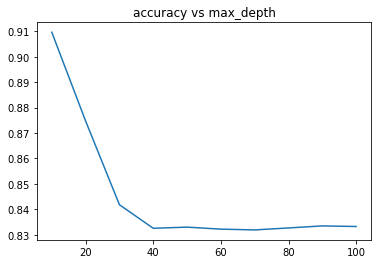

In [413]:
plt.plot(tree_res2['param_max_depth'],tree_res2['mean_test_score'])
plt.title('accuracy vs max_depth')
plt.show()

In [425]:
conf_dt2 =confusion_matrix(model_tree2.predict(X),y)
conf_dt2

print(conf_dt2)
print()

accuracy_dt2 = (conf_dt2[0,0] + conf_dt2[1,1])/sum(sum(conf_dt2))
print(accuracy_dt2)
real_positive_dt2 = conf_dt2[1,1]/(conf_dt2[1,1]+conf_dt2[0,1])
print(real_positive_dt2)

[[63427  5974]
 [   66   191]]

0.9132906485974331
0.030981346309813463


Random Forest :
Best training accuracy =  0.9125542872097631
Best parameters :  {'max_features': 'sqrt', 'n_estimators': 200}
Validation accuracy =  0.9066178581682458
test repartition : 
 0    12635
1     1297
Name: readmitted_YES, dtype: int64
Confusion matrix : 
 [[12629  1295]
 [    6     2]]


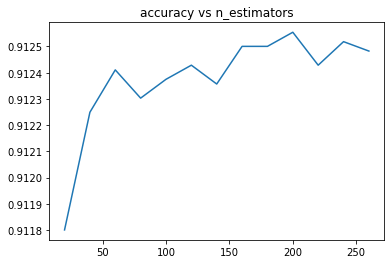

In [415]:
scoring_type='accuracy'

##------------------------------------------RF------------------------------------------##

n_estimators = [20*i for i in range(1,14)]
# Max features
max_features = ['sqrt'] #  = sqrt(n_features)

param_rf = {'n_estimators': n_estimators,
            'max_features' : max_features
               }

rf2,rf_res2 = test_rf_c(param_rf, scoring_type,X_train_new, X_test_new, y_train_new, y_test_new)
validation_curve(rf_res2)

make_sound()

In [424]:
conf_rf2 =confusion_matrix(rf2.predict(X),y)
conf_rf2
print(conf_rf2)
print()

accuracy_rf2 = (conf_rf2[0,0] + conf_rf2[1,1])/sum(sum(conf_rf2))
print(accuracy_rf2)
real_positive_rf2 = conf_rf2[1,1]/(conf_rf2[1,1]+conf_rf2[0,1])
print(real_positive_rf2)

[[63487  1296]
 [    6  4869]]

0.981308679548652
0.7897810218978102


Gradiant boosting : 
Best training accuracy =  0.9126440087143864
Best parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 25, 'random_state': 1, 'subsample': 1}
Validation accuracy =  0.9069049669824863
test repartition : 
 0    12635
1     1297
Name: readmitted_YES, dtype: int64
Confusion matrix : 
 [[12635  1297]
 [    0     0]]


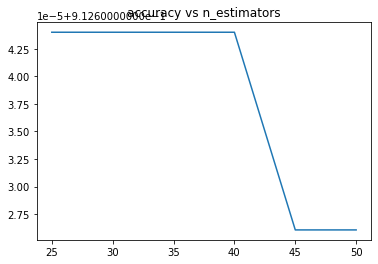

In [422]:
scoring_type='accuracy'

##------------------------------------------GB------------------------------------------##

param_gb = {'n_estimators': [5*i for i in range(5,11)], 'learning_rate' : [.1], 'max_depth' : [3], 'subsample' : [1], 'random_state': [1]}

gb2,gb_res2 = test_gb_c(param_gb, scoring_type,X_train_new, X_test_new, y_train_new, y_test_new)
validation_curve(gb_res2)

make_sound()

In [430]:
conf_gb2 =confusion_matrix(gb2.predict(X),y)
conf_gb2
print(conf_gb2)
print()

accuracy_gb2 = (conf_gb2[0,0] + conf_gb2[1,1])/sum(sum(conf_gb2))
print(accuracy_gb2)
real_positive_gb2 = conf_gb2[1,1]/(conf_gb2[1,1]+conf_gb2[0,1])
print(real_positive_gb2)

[[63493  6164]
 [    0     1]]

0.911510522840162
0.00016220600162206002


([<matplotlib.axis.XTick at 0x1ba822dda90>,
 [Text(0, 0, 'Decision Tree(o)'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forests(o)'),
  Text(3, 0, 'Random Forests'),
  Text(4, 0, 'Gradient Boosting(o)'),
  Text(5, 0, 'Gradient Boosting')])

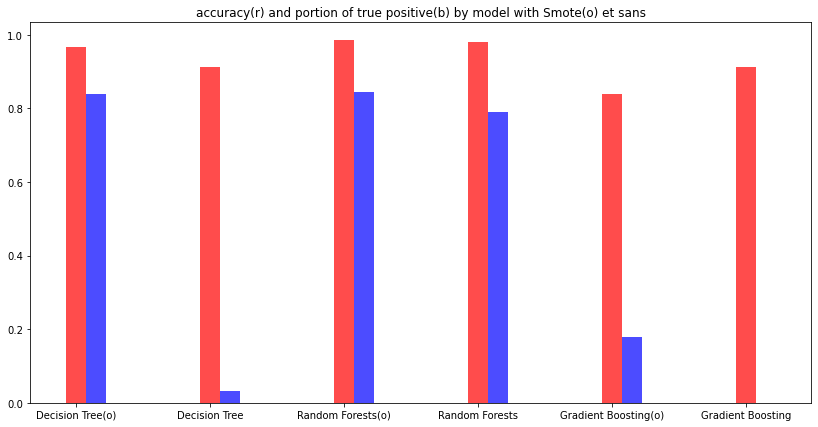

In [434]:
plt.figure(figsize=(14, 7))
ax = plt.subplot()

ax.set_title('accuracy(r) and portion of true positive(b) by model with Smote(o) et sans')


models = ['Decision Tree(o)','Decision Tree', 'Random Forests(o)','Random Forests', 'Gradient Boosting(o)','Gradient Boosting']
values = [accuracy_dt,accuracy_dt2, accuracy_rf,accuracy_rf2, accuracy_gb,accuracy_gb2]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot()

values = [real_positive_dt,real_positive_dt2,real_positive_rf,real_positive_rf2,real_positive_gb,real_positive_gb2]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'true positive')
plt.xticks(model, models)